# <center>Explorartory Data Analysis</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
sns.set()
%matplotlib inline

Let's load data already prepared and stored on disk

In [2]:
## load data from data.npz
def load_data():
    X_train = pd.read_pickle("./X_train.pkl")
    X_test  = pd.read_pickle("./X_test.pkl")
    with np.load('data.npz', allow_pickle=True) as npz_file:
        y_train_cla=pd.Series(npz_file['y_train_cla'] , name='book_rating_class')
        y_train_reg=pd.Series(npz_file['y_train_reg'] , name='book_rating_count_log')
        authors_df_train=pd.DataFrame(npz_file['authors_df_train'] , columns=npz_file['authors_to_keep'])
        genres_df_train=pd.DataFrame(npz_file['genres_df_train'] , columns=npz_file['genres_to_keep'])
        format_df_train=pd.DataFrame(npz_file['format_df_train'] , columns=npz_file['formats_to_keep'])
        title_df_train=pd.DataFrame(npz_file['title_df_train'] , columns=npz_file['title_columns'])
        desc_df_train=pd.DataFrame(npz_file['desc_df_train'] , columns=npz_file['desc_columns'])
        image_df_train=pd.DataFrame(npz_file['image_df_train'] , columns=npz_file['image_columns'])
        y_test_cla=pd.Series(npz_file['y_test_cla'] , name='book_rating_class')
        y_test_reg=pd.Series(npz_file['y_test_reg'] , name='book_rating_count_log')
        authors_df_test=pd.DataFrame(npz_file['authors_df_test'] , columns=npz_file['authors_to_keep'])
        genres_df_test=pd.DataFrame(npz_file['genres_df_test'] , columns=npz_file['genres_to_keep'])
        format_df_test=pd.DataFrame(npz_file['format_df_test'] , columns=npz_file['formats_to_keep'])
        title_df_test=pd.DataFrame(npz_file['title_df_test'] , columns=npz_file['title_columns'])
        desc_df_test=pd.DataFrame(npz_file['desc_df_test'] , columns=npz_file['desc_columns'])
        image_df_test=pd.DataFrame(npz_file['image_df_test'] , columns=npz_file['image_columns']) 
        authors_to_keep=npz_file['authors_to_keep']
        genres_to_keep=npz_file['genres_to_keep']
        formats_to_keep=npz_file['formats_to_keep']
        title_columns=npz_file['title_columns']
        desc_columns=npz_file['desc_columns']
        image_columns=npz_file['image_columns']
    return X_train,y_train_cla,y_train_reg, authors_df_train, genres_df_train, format_df_train, title_df_train, desc_df_train, image_df_train, X_test,y_test_cla,y_test_reg, authors_df_test, genres_df_test, format_df_test, title_df_test, desc_df_test, image_df_test, authors_to_keep, genres_to_keep, formats_to_keep, title_columns,desc_columns,image_columns

In [3]:
X_train_base,y_train_cla,y_train_reg, authors_df_train, genres_df_train, format_df_train, title_df_train, desc_df_train, image_df_train, X_test_base,y_test_cla,y_test_reg, authors_df_test, genres_df_test, format_df_test, title_df_test, desc_df_test, image_df_test, authors_to_keep, genres_to_keep, formats_to_keep, title_columns,desc_columns,image_columns = load_data()
#y_train_reg = y_train_reg.apply(np.exp)
#y_test_reg = y_test_reg.apply(np.exp)

In [4]:
X_train_base.head()

,book_title,book_authors,book_desc,book_format,book_genres,book_image_file,book_pages_log
0,An Enemy of the People,[henrik ibsen],"In An Enemy of the People, Ibsen places his ma...",paperback,"[plays, classics, drama, fiction, theatre]",images/120/120_58.jpg,5.105945
1,Revival,[stephen king],"A dark and electrifying novel about addiction,...",paperback,"[horror, fiction, thriller]",images/203/203_75.jpg,5.968708
2,The Devils of Loudun,[aldous huxley],"In 1634 Urbain Grandier, a handsome and dissol...",paperback,"[history, nonfiction, religion, classics]",images/95/95_97.jpg,5.993961
3,Casino Royale,[ian fleming],In the novel that introduced James Bond to the...,kindle,"[fiction, thriller, mystery, classics, spy thr...",images/571/571_3.jpg,5.247024
4,The Battlefield Where the Moon Says I Love You,[other],Poetry. Frank Stanford was called by Pulitzer ...,paperback,"[poetry, literature, 20th century]",images/212/212_62.jpg,5.950643


#### Correlation study between features and target variables
- **book_pages_log :**


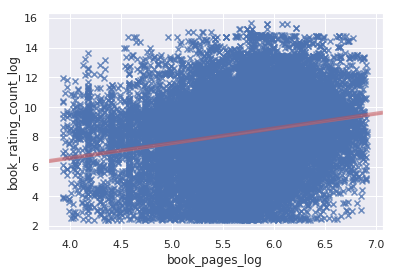

In [5]:
# scatter plot of these two variables
sns.regplot(data=pd.concat((X_train_base, y_train_reg), axis=1),x='book_pages_log',y='book_rating_count_log',line_kws={"color":"r","alpha":0.5,"lw":4},marker="x");

In [6]:
pd.concat((X_train_base, y_train_reg), axis=1).corr()

,book_pages_log,book_rating_count_log
book_pages_log,1.000000,0.202445
book_rating_count_log,0.202445,1.000000


There is a little positive correlation (0.18) between book_pages and rating count.


In [7]:
pd.concat((X_train_base, y_train_cla), axis=1).groupby('book_rating_class').mean().apply(np.exp)

,book_pages_log
book_rating_class,
0,280.023912
1,300.043776
2,309.794569
3,318.418930


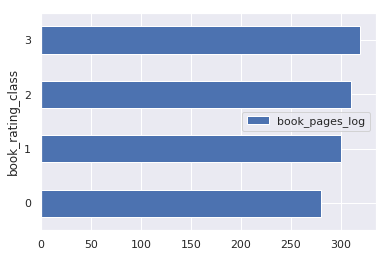

In [8]:
pd.concat((X_train_base, y_train_cla), axis=1).groupby('book_rating_class').mean().apply(np.exp).plot.barh(y='book_pages_log');

The mean value of book pages increases very slightly (between 5 and 10 pages) when rating class increses.

The distribution of book pages per rating class shows also this little correlation :

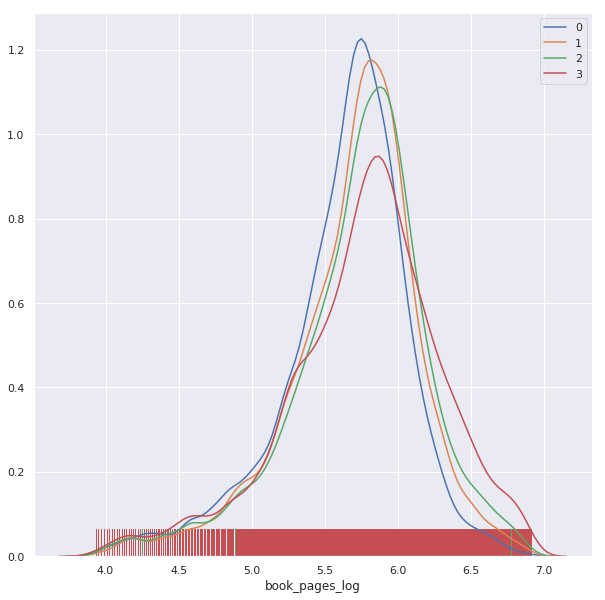

In [9]:
f, ax = plt.subplots(1, 1, figsize=(10,10))
tmp_data=pd.concat((X_train_base.book_pages_log, y_train_cla), axis=1)
for cla in np.arange(4):
    sns.distplot(tmp_data[tmp_data.book_rating_class == cla].book_pages_log, hist=False, rug=True, ax=ax, label=cla)
del tmp_data



Conclusion :

- Books rated more frequently have, in general, more pages.
- Higher rated books usually have slightly more pages.

- **book_genres :**

For rating class :

In [10]:
top10_genres = pd.Series([genre for genres in X_train_base.book_genres for genre in genres]).value_counts()[:10].index
tmp = pd.DataFrame([(genre,row[1]) for i, row in pd.concat((X_train_base.book_genres, y_train_cla), axis=1).iterrows() for genre in row[0]], columns=['book_genres','rating_class'])
ct = pd.crosstab(tmp.book_genres, tmp.rating_class)
top10_df = pd.concat((100*ct.loc[top10_genres].div(ct.loc[top10_genres].sum(axis=1), axis=0), ct.loc[top10_genres].sum(axis=1).rename('total number')), axis=1)
top10_df

,0,1,2,3,total number
fiction,29.542837,28.080378,24.493321,17.883464,17368
fantasy,22.959236,24.817743,25.721327,26.501694,9739
romance,25.496009,24.914481,26.476625,23.112885,8770
young adult,29.052774,26.820027,24.316644,19.810555,7390
nonfiction,16.469905,22.275982,30.578672,30.675440,5167
historical,24.756098,29.044715,26.443089,19.756098,4920
historical fiction,24.709042,29.095792,26.298120,19.897046,4468
contemporary,34.264305,25.635786,24.114441,15.985468,4404
mystery,29.903004,31.984859,25.668323,12.443814,4227
paranormal,27.111826,24.108340,25.261464,23.518370,3729


If the two variables are independant, the values of each rows must be very close. Which is not the case.

For example, fiction and mysteriy books are more rarely rated as class 4 (Very high).<br>
In contrast, romance and non fiction books are more better rated (rarely as class 0(Low)).

Let's verfiy that using chi2 test, which tests independance of variables:

In [11]:
t_stat, p_value, df, expected_array = chi2_contingency(ct)
print(t_stat, p_value)

16016.509918548625 0.0


We can reject Ho (variable independance). The two variables are correlated.

This is the expected values if they are independent

In [12]:
ex_ct = pd.DataFrame(expected_array, columns=ct.columns[:4], index=ct.index).loc[top10_genres]
ex_top10_df = pd.concat((100*ex_ct.loc[top10_genres].div(ex_ct.loc[top10_genres].sum(axis=1), axis=0), ex_ct.loc[top10_genres].sum(axis=1).rename('total number')), axis=1)
ex_top10_df

,0,1,2,3,total number
fiction,25.196899,25.755766,26.289845,22.75749,17368.0
fantasy,25.196899,25.755766,26.289845,22.75749,9739.0
romance,25.196899,25.755766,26.289845,22.75749,8770.0
young adult,25.196899,25.755766,26.289845,22.75749,7390.0
nonfiction,25.196899,25.755766,26.289845,22.75749,5167.0
historical,25.196899,25.755766,26.289845,22.75749,4920.0
historical fiction,25.196899,25.755766,26.289845,22.75749,4468.0
contemporary,25.196899,25.755766,26.289845,22.75749,4404.0
mystery,25.196899,25.755766,26.289845,22.75749,4227.0
paranormal,25.196899,25.755766,26.289845,22.75749,3729.0


This is the actual proportion of each class per genre and the expected proportion if the two features were independant:

In [13]:
pd.DataFrame(np.vectorize(lambda x,y : f"{x:.2f} ({y:.2f})")(top10_df, ex_top10_df), columns=top10_df.columns, index = top10_df.index)

,0,1,2,3,total number
fiction,29.54 (25.20),28.08 (25.76),24.49 (26.29),17.88 (22.76),17368.00 (17368.00)
fantasy,22.96 (25.20),24.82 (25.76),25.72 (26.29),26.50 (22.76),9739.00 (9739.00)
romance,25.50 (25.20),24.91 (25.76),26.48 (26.29),23.11 (22.76),8770.00 (8770.00)
young adult,29.05 (25.20),26.82 (25.76),24.32 (26.29),19.81 (22.76),7390.00 (7390.00)
nonfiction,16.47 (25.20),22.28 (25.76),30.58 (26.29),30.68 (22.76),5167.00 (5167.00)
historical,24.76 (25.20),29.04 (25.76),26.44 (26.29),19.76 (22.76),4920.00 (4920.00)
historical fiction,24.71 (25.20),29.10 (25.76),26.30 (26.29),19.90 (22.76),4468.00 (4468.00)
contemporary,34.26 (25.20),25.64 (25.76),24.11 (26.29),15.99 (22.76),4404.00 (4404.00)
mystery,29.90 (25.20),31.98 (25.76),25.67 (26.29),12.44 (22.76),4227.00 (4227.00)
paranormal,27.11 (25.20),24.11 (25.76),25.26 (26.29),23.52 (22.76),3729.00 (3729.00)


For rating count :

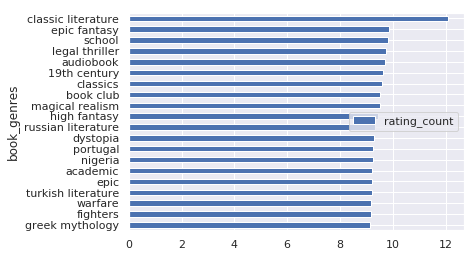

In [14]:
tmp = pd.DataFrame([(genre,row[1]) for i, row in pd.concat((X_train_base.book_genres, y_train_reg), axis=1).iterrows() for genre in row[0]], columns=['book_genres','rating_count'])
tmp.groupby('book_genres').mean().reset_index().sort_values('rating_count', ascending=False).head(20).sort_values('rating_count').plot.barh(x='book_genres', y='rating_count');

There is a correlation between genre and rating count.

The school, academic and classic books are the most rated books.

- **book_format :**


In [15]:
ct = pd.crosstab(X_train_base.book_format, y_train_cla)
df = pd.concat((100*ct.div(ct.sum(axis=1), axis=0),ct.sum(axis=1).rename('total number')), axis=1)
df

,0,1,2,3,total number
book_format,,,,,
audio,27.027027,24.324324,24.324324,24.324324,37
binding,26.415094,20.754717,37.735849,15.094340,53
comics,0.000000,8.333333,8.333333,83.333333,12
ebook,19.514170,21.295547,27.044534,32.145749,1235
hardcover,28.818517,25.041333,23.998474,22.141676,7863
kindle,19.535157,20.329509,26.390115,33.745219,3399
leather bound,0.000000,12.500000,25.000000,62.500000,8
mass market,19.689674,29.320492,30.658106,20.331728,1869
nook,14.492754,30.434783,31.884058,23.188406,69


This statistic has sense when total number is high (for example >50).

We can see that kindle and ebooks are more appreciated by readers (class 3).

Chi2 test confirms the correlation between the two variables.

In [16]:
t_stat, p_value, _, _ = chi2_contingency(ct)
print(t_stat, p_value)

467.9605918383665 2.632617006425369e-78


We can reject Ho (variable independance). The two variables are correlated.


For rating count :

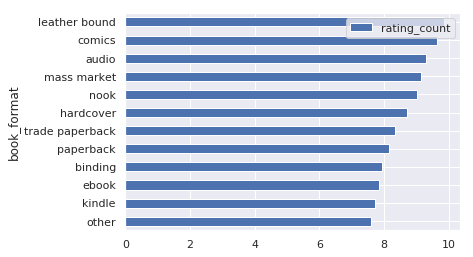

In [17]:
tmp = pd.concat((X_train_base.book_format, y_train_reg.rename('rating_count')), axis=1)
tmp.groupby('book_format').mean().reset_index().sort_values('rating_count', ascending=False).head(20).sort_values('rating_count').plot.barh(x='book_format', y='rating_count');

In [18]:
tmp[tmp.book_format == 'capa dura']

,book_format,rating_count


There is a clear correlation between format and rating count.

- **book_authors :**

for rating class :

In [19]:
top10_authors = pd.Series([author for authors in X_train_base.book_authors for author in authors]).value_counts()[:10].index
tmp = pd.DataFrame([(author,row[1]) for i, row in pd.concat((X_train_base.book_authors, y_train_cla), axis=1).iterrows() for author in row[0]], columns=['book_authors','rating_class'])
ct = pd.crosstab(tmp.book_authors, tmp.rating_class)
100*ct.loc[top10_authors].div(ct.loc[top10_authors].sum(axis=1), axis=0)

rating_class,0,1,2,3
other,28.004957,24.897531,24.568678,22.528834
stephen king,23.333333,29.166667,19.166667,28.333333
terry pratchett,6.097561,21.951220,17.073171,54.878049
neil gaiman,3.703704,20.987654,40.740741,34.567901
nora roberts,2.564103,21.794872,55.128205,20.512821
agatha christie,23.684211,39.473684,17.105263,19.736842
james patterson,17.391304,42.028986,33.333333,7.246377
cassandra clare,8.620690,0.000000,27.586207,63.793103
rick riordan,1.785714,5.357143,17.857143,75.000000
francine pascal,90.740741,5.555556,1.851852,1.851852


If the two variables are independant, the values of each rows must be very close. Which is not the case.

For example, james patterson and meg cabot books are more rarely rated as class 4 (Very high).<br>
In contrast, rick riordan, terry pratechett and cassandra clare books are more better rated (rarely as class 0(Low), and mostly as class 4).

Let's verfiy that using chi2 test, which tests independance of variables:

In [20]:
t_stat, p_value, _, _ = chi2_contingency(ct)
print(t_stat, p_value)

11220.208400402498 0.0


We can reject Ho (variable independance). The two variables are correlated.

For rating count :

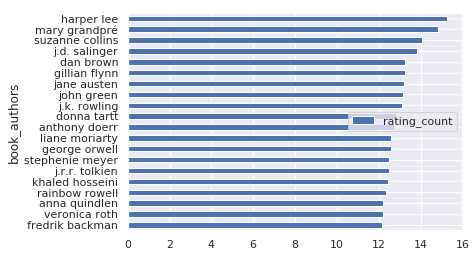

In [21]:
tmp = pd.DataFrame([(author,row[1]) for i, row in pd.concat((X_train_base.book_authors, y_train_reg), axis=1).iterrows() for author in row[0]], columns=['book_authors','rating_count'])
tmp.groupby('book_authors').mean().reset_index().sort_values('rating_count', ascending=False).head(20).sort_values('rating_count').plot.barh(x='book_authors', y='rating_count');

There is a clear correlation between genre and rating count.

Harper lee, mary grandpré and suzanne collins books are the most rated ones.

#### Feature importance and PCA


In [22]:
from sklearn.decomposition import PCA

In [23]:
X_train = pd.concat((X_train_base.book_pages_log,authors_df_train, genres_df_train, format_df_train, title_df_train, desc_df_train, image_df_train), axis=1)
X_test = pd.concat((X_test_base.book_pages_log,authors_df_test, genres_df_test, format_df_test, title_df_test, desc_df_test, image_df_test), axis=1)
print(X_train.shape, X_test.shape)

(32234, 4373) (8059, 4373)


- **PCA :**

We will generate a Scree plot of data

In [24]:
def plot_scree(data):
    fig, ax = plt.subplots()
    fig.set_size_inches(15,20)
    pca = PCA()
    pca.fit(data)
    # cumulated sum of explained variance
    cs_evr = np.cumsum(pca.explained_variance_ratio_)
    pct = np.arange(1,11)
    # return value will be a dataframe containing number of components needed to explain 10% 20% ... 100%
    # np.argmax(cs_evr>=x) : gives the first element in vector cs_evr which is greater than x. x from 10% to 100%.
    return_value = pd.DataFrame({'Percent explained':10*pct, 'Nbr of components':[1+np.argmax(cs_evr>=x) for x in pct/10]})
    ax.plot(cs_evr)
    ax.set_title(f'Scree Plot for features')
    ax.set_xlabel('Number of components')
    ax.set_ylabel(f'Cumulative explained variance')
    print(return_value)
def plot_pca_2(data):
    pca_2 = PCA(n_components=2)
    X_pca = pca_2.fit_transform(data)
    names={0:'Low', 1:'Medium', 2:'High', 3:'Very High'}
    y_names = [names[i] for i in y_train_cla]
    plt.figure(figsize=(20,10))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_names);
    plt.title('PCA scatterplot for train data')
    plt.xlabel('Component_1')
    plt.ylabel('Component_2')

   Percent explained  Nbr of components
0                 10                  1
1                 20                  2
2                 30                  4
3                 40                  8
4                 50                 16
5                 60                 35
6                 70                 78
7                 80                172
8                 90                423
9                100                  1


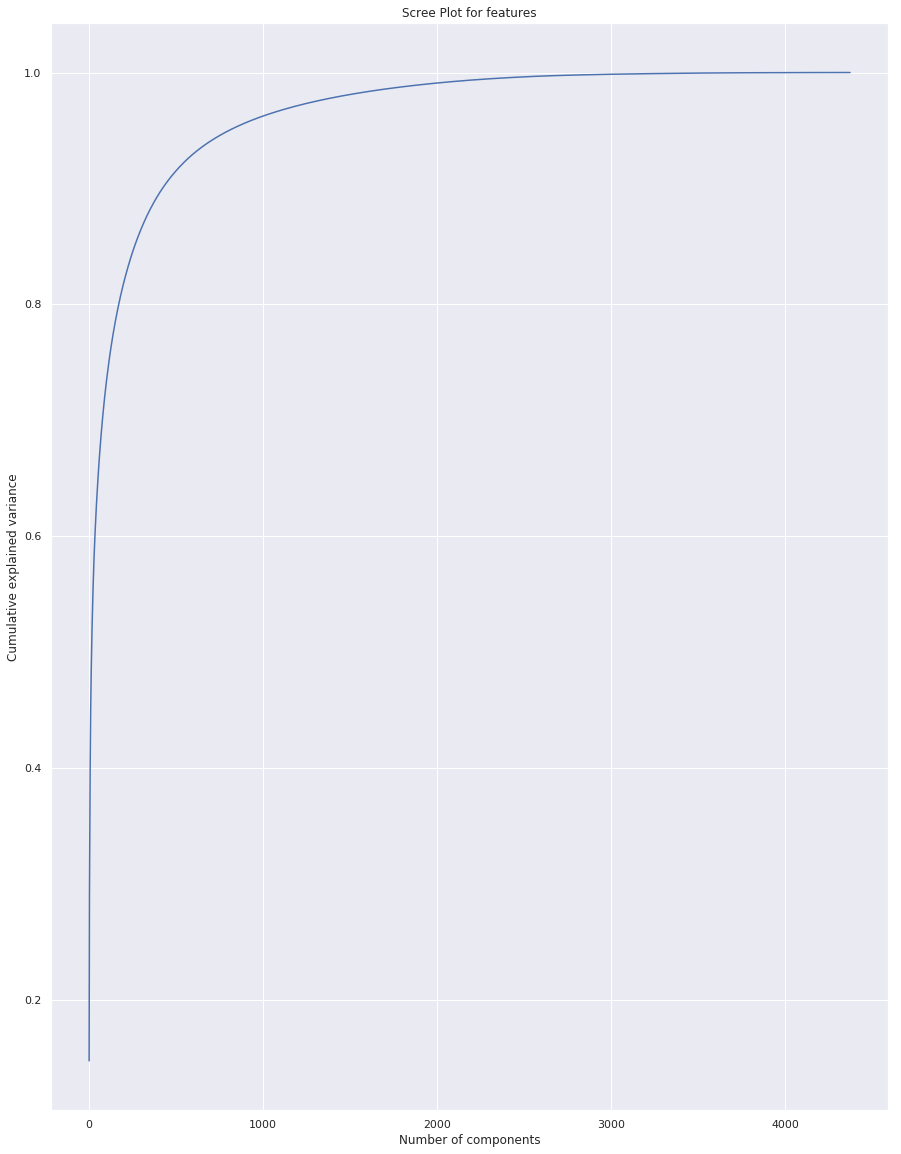

In [25]:
plot_scree(X_train)

 We will visualize the rating class on a 2d-plot with PCA using the first two components

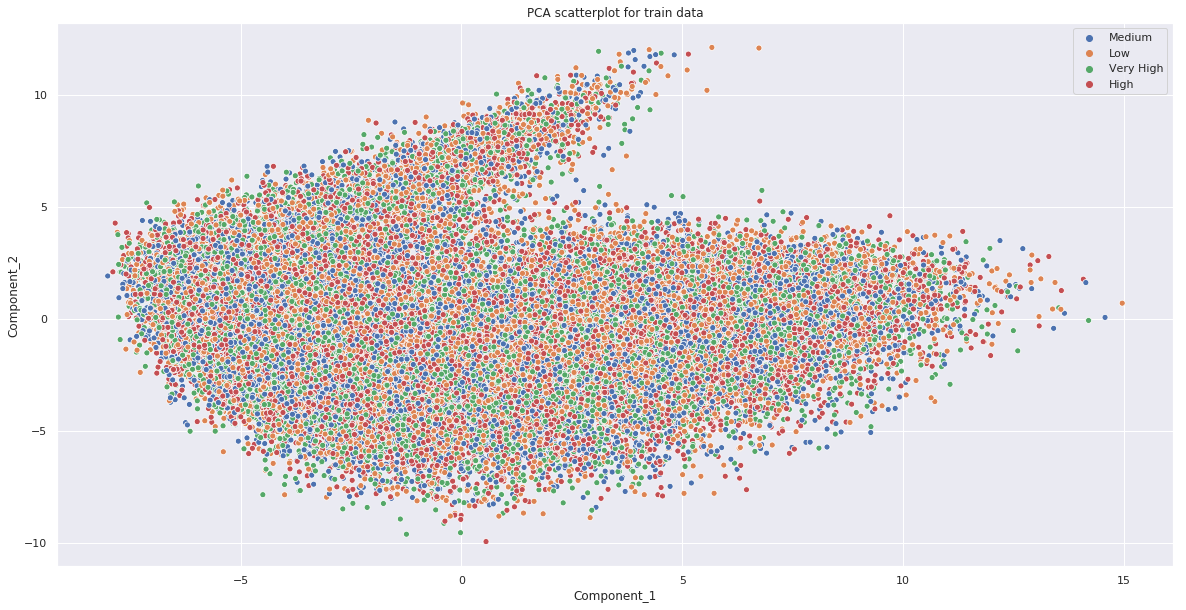

In [26]:
plot_pca_2(X_train)

Two components explain only 20% of the variance. That's why classes are not separated in the figure.

We will use only numeric and categorical features (no text of image) to plot PCA charts :

   Percent explained  Nbr of components
0                 10                  2
1                 20                  4
2                 30                  6
3                 40                  9
4                 50                 15
5                 60                 25
6                 70                 42
7                 80                 78
8                 90                187
9                100                  1


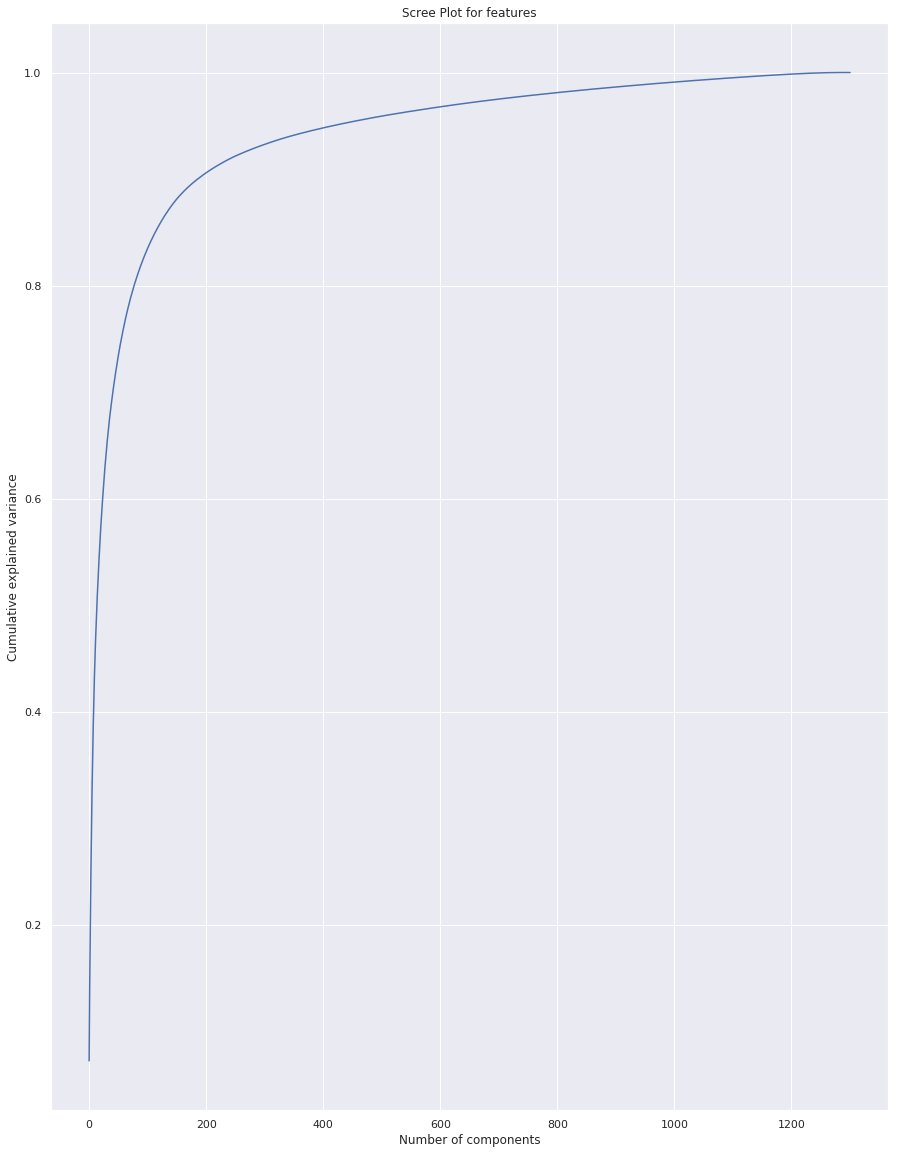

In [27]:
plot_scree(pd.concat((X_train_base.book_pages_log,authors_df_train, genres_df_train, format_df_train), axis=1))

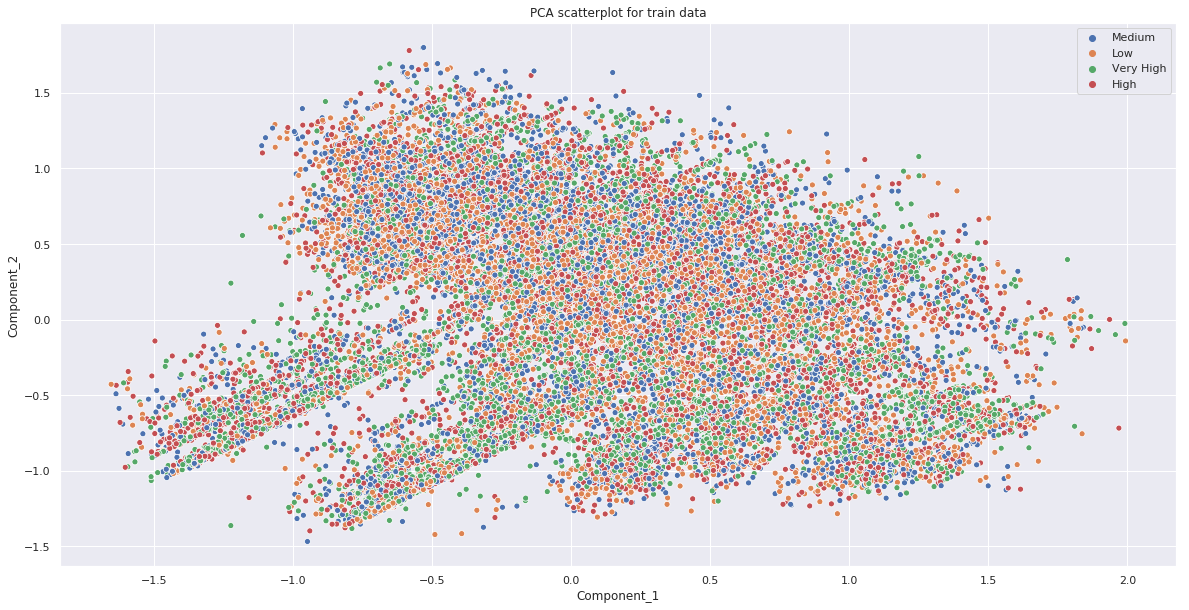

In [28]:
plot_pca_2(pd.concat((X_train_base.book_pages_log,authors_df_train, genres_df_train, format_df_train), axis=1))

Two components explains only 10% of variance. With numeric and categorical features, components are not clearly separated also.

In order to see if classes can be separated using more components, we will use TSNE algorithm for visualisation.

TSNE takes a lot of time if using all features, so we will use it only with 100 PCA components which explains more than 80% of variance.

In [29]:
from sklearn.manifold import TSNE

In [30]:
pca_100 = PCA(n_components=100)
X_pca = pca_100.fit_transform(X_train)

In [31]:
tsne2 = TSNE(n_components=2, verbose=0, n_iter=250)
X_tsne = tsne2.fit_transform(X_pca)

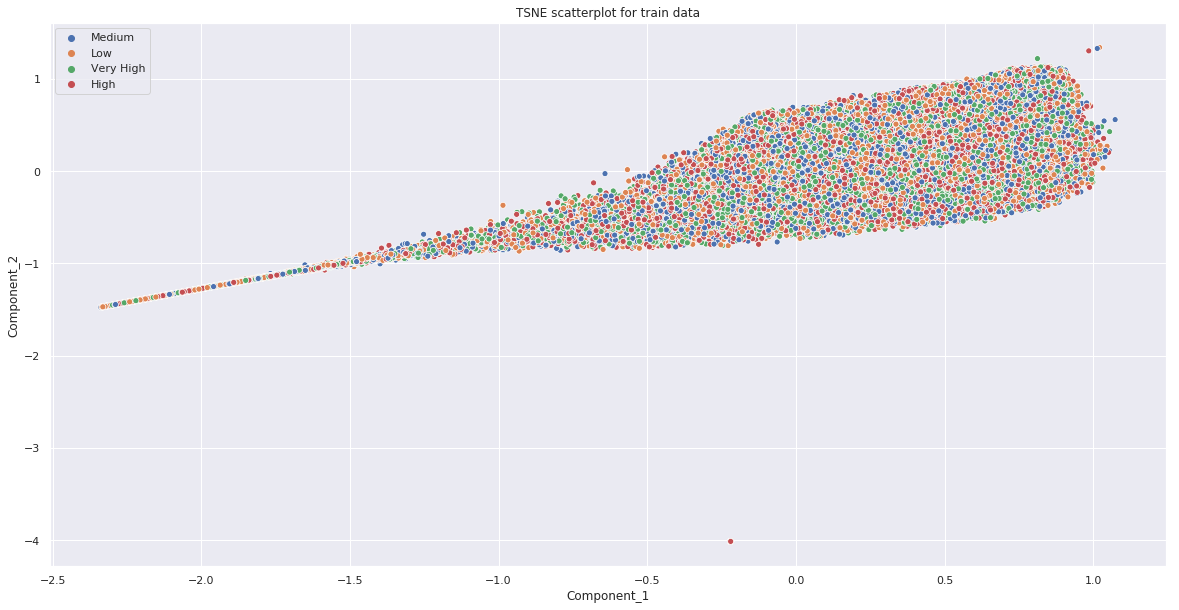

In [32]:
plt.figure(figsize=(20,10))
names={0:'Low', 1:'Medium', 2:'High', 3:'Very High'}
y_names = [names[i] for i in y_train_cla]
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_names);
plt.title('TSNE scatterplot for train data')
plt.xlabel('Component_1')
plt.ylabel('Component_2');

Classes are not visually separate even with TSNE.

A first conclusion is that available features does not contains suffisant information to clearly predict target variables.

This conclusion can be confirmed when trying to predict target variables with many machine learning  models in the next sections of this project. 

- **Feature importance :**

We will use many techniques : decision tree, random forest, xgboost and lelectKbest.

Using decision trees :

In [33]:
import graphviz
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
y_train_cla_1h = LabelBinarizer().fit_transform(y_train_cla.values.reshape(-1, 1))
y_test_cla_1h = LabelBinarizer().fit_transform(y_test_cla.values.reshape(-1, 1))
def fit(model, X, y, X_t, y_t, score=None):
    model.fit(X,y)
    if score=='roc_auc':
        tr_score = roc_auc_score(LabelBinarizer().fit_transform(y.values.reshape(-1, 1)), model.predict_proba(X))
        ts_score = roc_auc_score(LabelBinarizer().fit_transform(y_t.values.reshape(-1, 1)), model.predict_proba(X_t))
    else:
        tr_score = model.score(X, y)
        ts_score = model.score(X_t, y_t)
    print ('Train_score = %s , test_score= %s'%(tr_score, ts_score))
def feature_importance(forest, imp=None, columns=None):
    if imp is None:
        importances = forest.feature_importances_
    else:
        importances = imp#[~np.isnan(imp)]
    indices = np.argsort(importances)[::-1][:10]
    vals = importances[indices]
    if columns is None:
        cols = X_train.columns[indices]
    else:
        cols=columns#[~np.isnan(imp)]
    plt.figure()
    plt.title("Feature importances")
    plt.barh(range(10), vals,  color="r", align="center")
    plt.yticks(range(10), cols)
    plt.show()

In [34]:
dt = DecisionTreeClassifier(random_state=0,max_depth=3)
fit(dt,X_train, y_train_cla, X_test, y_test_cla)

Train_score = 0.34199913135198856 , test_score= 0.3365181784340489


In [35]:
dt_reg = DecisionTreeRegressor(random_state=0,max_depth=3)
fit(dt_reg,X_train, y_train_cla, X_test, y_test_cla)

Train_score = 0.09258558668191519 , test_score= 0.0862400174090433


The train and test scores are very low. To have an idea about feature importance, we will plot the decision trees

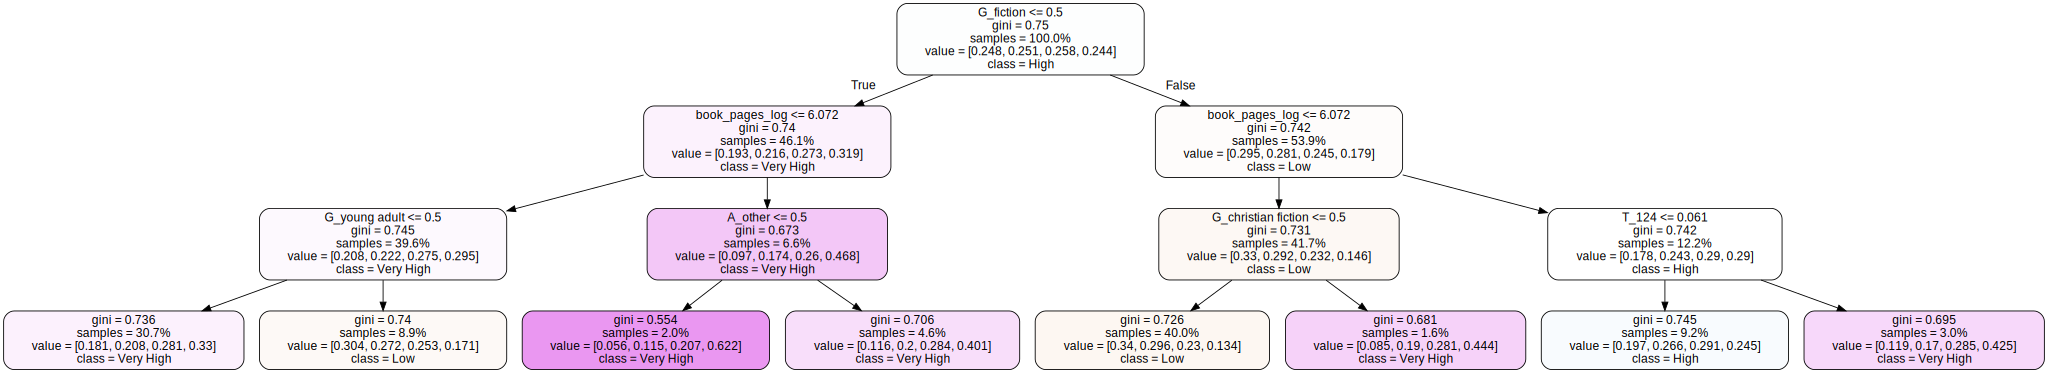

In [36]:
dot_data = export_graphviz( dt, out_file=None, feature_names=X_train.columns, class_names=names,filled=True, rounded=True, proportion=True)
graphviz.Source(dot_data)

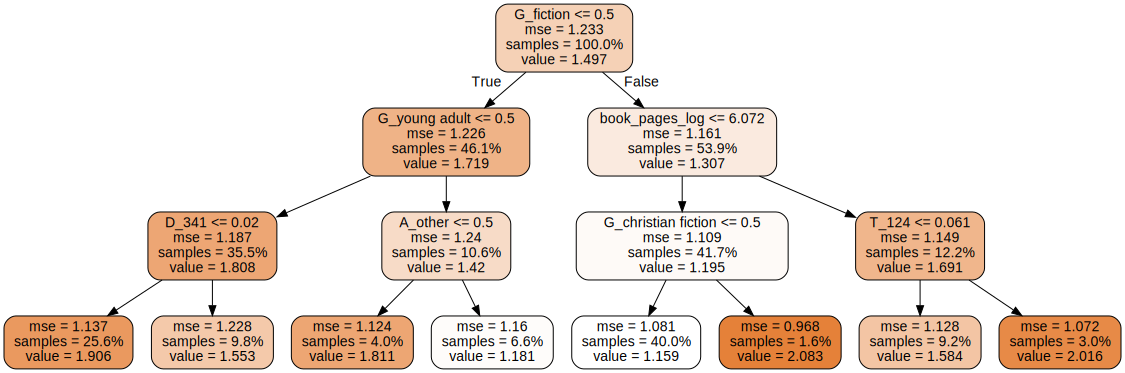

In [37]:
dot_data = export_graphviz( dt_reg, out_file=None, feature_names=X_train.columns, class_names=names,filled=True, rounded=True, proportion=True)
graphviz.Source(dot_data)

Genre and book pages are the most important features for classification and regression.

Now, we will use random forest to show feature importance for all features.

In [38]:
rf = RandomForestClassifier(random_state=0, n_estimators=10, min_samples_leaf=10)
fit(rf,X_train, y_train_cla, X_test, y_test_cla, 'roc_auc')

Train_score = 0.9653215376989115 , test_score= 0.592542417127768


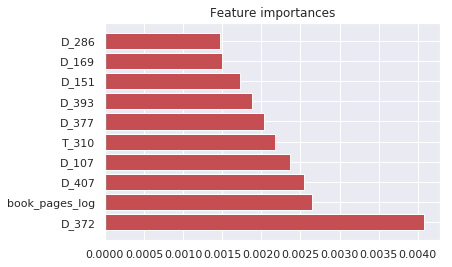

In [39]:
feature_importance(rf)

As we can see, the most important features are book_pages, genre, title and description.
Neverthless, the model overfits and must be tuned.

In [40]:
rf_reg = RandomForestRegressor(random_state=0, n_estimators=10, min_samples_leaf=10)
fit(rf_reg,X_train, y_train_reg, X_test, y_test_reg)

Train_score = 0.8115504802482906 , test_score= 0.453321062820585


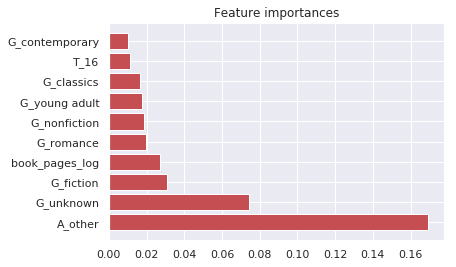

In [41]:
feature_importance(rf_reg)

In [42]:
!pip install xgboost

In [43]:
import xgboost as xgb
def fit_xgb(X_train, y_train_cla, display_fi=True):
    dtrain = xgb.DMatrix(data=X_train, label=y_train_cla)
    #dtrain_reg = xgb.DMatrix(data=X_train, label=y_train_reg)
    dtest = xgb.DMatrix(data=X_test)
    params = {
        'max_depth': 6,
        'objective': 'multi:softprob', 
        'num_class': 4,
        'n_gpus': 0,
        'nthread': 16
    }
    model = xgb.train(params, dtrain) 
    pred = model.predict(dtest)
    tr_pred = model.predict(dtrain)
    s1 = roc_auc_score(y_train_cla_1h, tr_pred)
    s2 = accuracy_score(y_train_cla, np.argmax(tr_pred,axis=1))
    print ('train : auc score :%s, accuracy score :%s'%(s1,s2))
    s1_t = roc_auc_score(y_test_cla_1h, pred)
    s2_t = accuracy_score(y_test_cla, np.argmax(pred,axis=1))
    print ('test : auc score :%s, accuracy score :%s'%(s1_t,s2_t))
    print(confusion_matrix(y_test_cla, np.argmax(pred,axis=1)))
    if display_fi:
        fi = model.get_score(importance_type='gain')
        feature_importance(model,np.array(list(fi.values())), list(fi.keys()))
    return s2, s1, s2_t, s1_t
    
def fit_xgb_reg(X_train, y_train_reg, display_fi=True):
    dtrain_reg = xgb.DMatrix(data=X_train, label=y_train_reg)
    dtest = xgb.DMatrix(data=X_test)
    params_reg = {
    'max_depth': 6,
    'n_gpus': 0,
    'nthread': 16
    }
    model_reg = xgb.train(params_reg, dtrain_reg)  
    pred_reg = model_reg.predict(dtest)
    train_reg=model_reg.predict(dtrain_reg)
    s2 = np.sqrt(mean_squared_error(y_test_reg, pred_reg))
    s1 = np.sqrt(mean_squared_error(y_train_reg, train_reg))
    print ('RMSE : train score :%s, test score :%s'%(s1,s2))
    if display_fi:
        fi = model_reg.get_score(importance_type='gain')
        feature_importance(model_reg,np.array(list(fi.values())), list(fi.keys()))
    return s2, np.nan, s1, np.nan
    


Classification :

train : auc score :0.8359441245004575, accuracy score :0.6015697710492027
test : auc score :0.6840953256047567, accuracy score :0.41419530959176076
[[1110  301  292  272]
 [ 738  518  413  385]
 [ 452  416  612  586]
 [ 227  242  397 1098]]


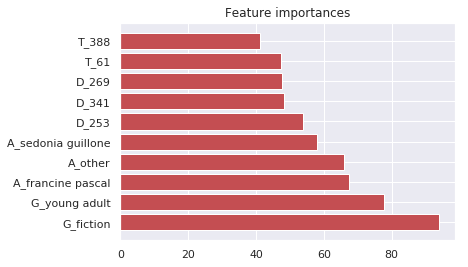

(0.6015697710492027,
 0.8359441245004575,
 0.41419530959176076,
 0.6840953256047567)

In [44]:
fit_xgb(X_train, y_train_cla);

Regression :

RMSE : train score :1.628636464135782, test score :1.720098450020498


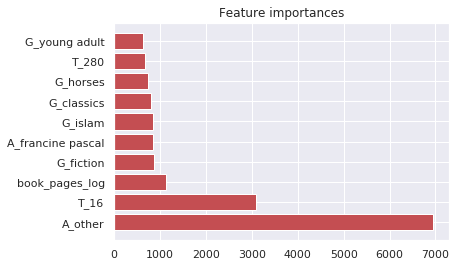

(1.720098450020498, nan, 1.628636464135782, nan)

In [45]:
fit_xgb_reg(X_train, y_train_reg);

SelectKbest feature importance

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
col_names=X_train.columns

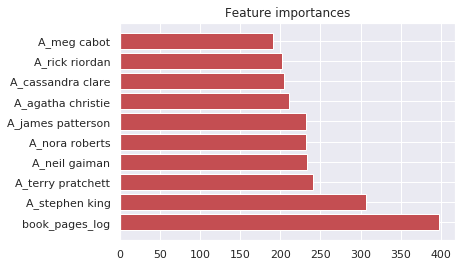

In [47]:
skb=SelectKBest(score_func=f_classif, k=10)
skb.fit(X_train,y_train_cla)
feature_importance(skb, skb.scores_[~np.isnan(skb.scores_)], col_names[~np.isnan(skb.scores_)])

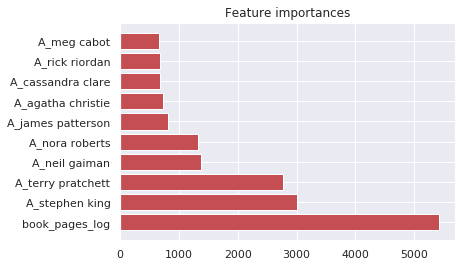

In [48]:
skb_reg=SelectKBest(score_func=f_regression, k=10)
skb_reg.fit(X_train,y_train_reg)
feature_importance(skb_reg, skb_reg.scores_[~np.isnan(skb.scores_)], col_names[~np.isnan(skb.scores_)])

Using all these techniques, we can conclude that the most important features are the categorical and text ones. Image features does not appear in feature importance lists.

This conclusion is validated by the following test : We will train an xgboost model using many subsets of features and see impact of each one on the model accuracy.

In [49]:
print ('All features Model')
X_train = pd.concat((X_train_base.book_pages_log,authors_df_train, genres_df_train, format_df_train, title_df_train, desc_df_train, image_df_train), axis=1)
X_test = pd.concat((X_test_base.book_pages_log,authors_df_test, genres_df_test, format_df_test, title_df_test, desc_df_test, image_df_test), axis=1)
print(X_train.shape, X_test.shape)
fit_xgb(X_train, y_train_cla, False)
print ('Features without text and images Model')
X_train = pd.concat((X_train_base.book_pages_log,authors_df_train, genres_df_train, format_df_train), axis=1)
X_test = pd.concat((X_test_base.book_pages_log,authors_df_test, genres_df_test, format_df_test), axis=1)
print(X_train.shape, X_test.shape)
fit_xgb(X_train, y_train_cla, False)
print ('Features with title and desc only Model')
X_train = pd.concat((X_train_base.book_pages_log,authors_df_train, genres_df_train, format_df_train, title_df_train, desc_df_train), axis=1)
X_test = pd.concat((X_test_base.book_pages_log,authors_df_test, genres_df_test, format_df_test, title_df_test, desc_df_test), axis=1)
print(X_train.shape, X_test.shape)
tr_acc, tr_auc, t_acc, t_aux = fit_xgb(X_train, y_train_cla, False)
print ('Features with title only Model')
X_train = pd.concat((X_train_base.book_pages_log,authors_df_train, genres_df_train, format_df_train, title_df_train), axis=1)
X_test = pd.concat((X_test_base.book_pages_log,authors_df_test, genres_df_test, format_df_test, title_df_test), axis=1)
print(X_train.shape, X_test.shape)
fit_xgb(X_train, y_train_cla, False)
print ('Features with desc only Model')
X_train = pd.concat((X_train_base.book_pages_log,authors_df_train, genres_df_train, format_df_train, desc_df_train), axis=1)
X_test = pd.concat((X_test_base.book_pages_log,authors_df_test, genres_df_test, format_df_test, desc_df_test), axis=1)
print(X_train.shape, X_test.shape)
fit_xgb(X_train, y_train_cla, False);

All features Model
(32234, 4373) (8059, 4373)
train : auc score :0.8359441245004575, accuracy score :0.6015697710492027
test : auc score :0.6840953256047567, accuracy score :0.41419530959176076
[[1110  301  292  272]
 [ 738  518  413  385]
 [ 452  416  612  586]
 [ 227  242  397 1098]]
Features without text and images Model
(32234, 1301) (8059, 1301)
train : auc score :0.717822904518308, accuracy score :0.4499596699137557
test : auc score :0.6899561769968839, accuracy score :0.415684328080407
[[1129  273  239  334]
 [ 816  475  321  442]
 [ 461  382  547  676]
 [ 241  165  359 1199]]
Features with title and desc only Model
(32234, 2325) (8059, 2325)
train : auc score :0.8289460696122135, accuracy score :0.5917974809207669
test : auc score :0.6866579927820428, accuracy score :0.41444347933986847
[[1102  344  277  252]
 [ 775  512  430  337]
 [ 428  412  652  574]
 [ 238  246  406 1074]]
Features with title only Model
(32234, 1813) (8059, 1813)
train : auc score :0.8037807384273126, accu

(0.566079295154185, 0.809956570507485, 0.41158952723662984, 0.6809316609605482)

We can see that including image features has a negative impact on performance.

In the next section, we will exlude image features from data when training our selection of machine learning models.